# **Visualize data in a Spark notebook**


In [5]:
%%sql
-- You can run a chart based on inbuilt or native charts in the notebook
SELECT 
    SalesOrderNumber, 
    SUM(Quantity) AS TotalQty
FROM sales
GROUP BY SalesOrderNumber
ORDER BY TotalQty DESC

StatementMeta(, 322849f7-5231-4b1e-b618-bcd51d6fcc8e, 7, Finished, Available)

<Spark SQL result set with 1000 rows and 2 fields>

In [9]:
%%sql
-- Retrieve top 5 item by quantity
SELECT
    item, 
    SUM(Quantity) AS TotalQty
FROM sales
GROUP BY item
ORDER BY TotalQty DESC
LIMIT 5

StatementMeta(, 322849f7-5231-4b1e-b618-bcd51d6fcc8e, 11, Finished, Available)

<Spark SQL result set with 5 rows and 2 fields>

# Using graphics packages in code
One could employ built in visualization modules in python like 
- **matplotlib**
- **seaborn**
- **pyplot**

StatementMeta(, 322849f7-5231-4b1e-b618-bcd51d6fcc8e, 17, Finished, Available)

<Figure size 640x480 with 0 Axes>

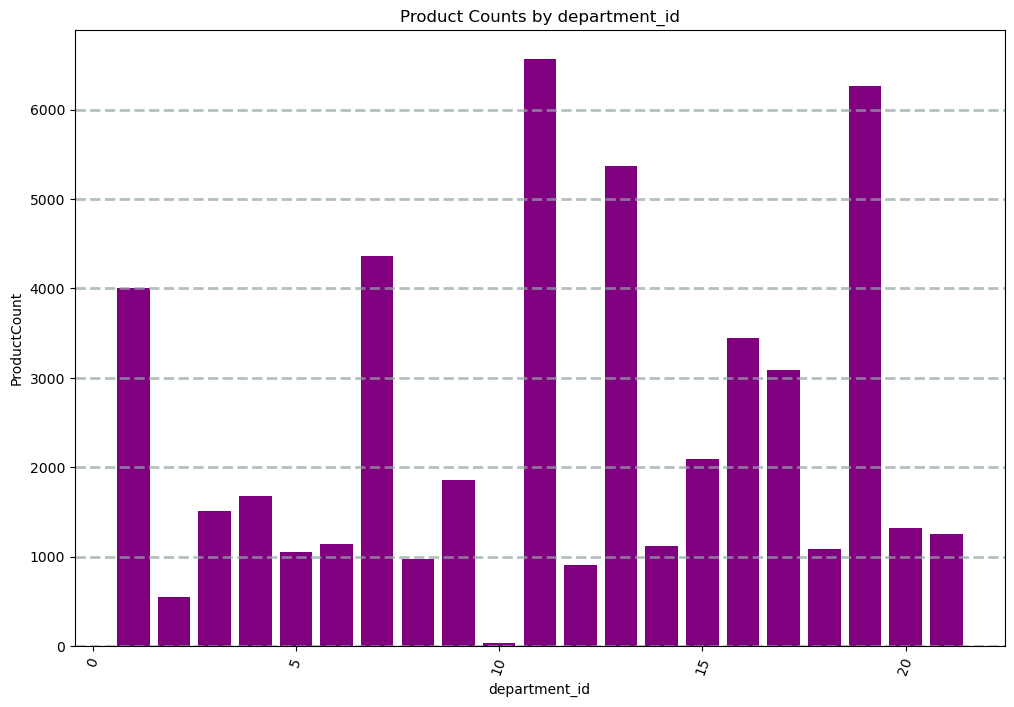

In [15]:
from matplotlib import pyplot as plt

# Get the data as a Pandas dataframe
data = spark.sql("SELECT department_id, COUNT(product_id) AS ProductCount \
                  FROM products \
                  GROUP BY department_id \
                  ORDER BY department_id").toPandas()

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by department_id
plt.bar(x=data['department_id'], height=data['ProductCount'], color='purple')

# Customize the chart
plt.title('Product Counts by department_id')
plt.xlabel('department_id')
plt.ylabel('ProductCount')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()